In [62]:
import cv2 as cv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

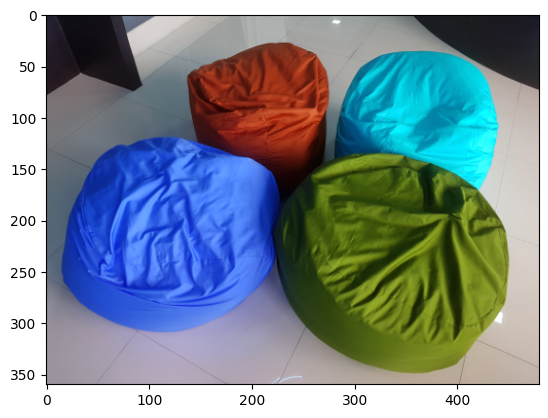

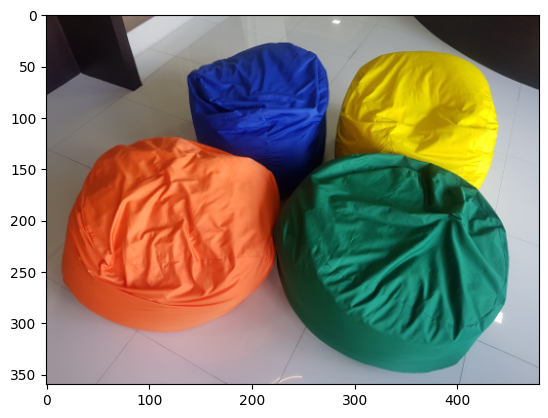

In [63]:
img = cv.imread("/Users/israel_macias/Desktop/xd/threshold/bags.png")
plt.imshow(img)
plt.show()
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

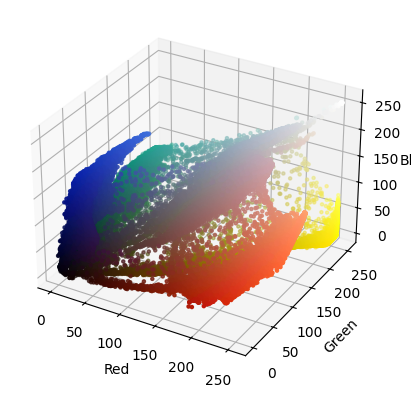

In [64]:
r,g,b = cv.split(img)

fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection = "3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

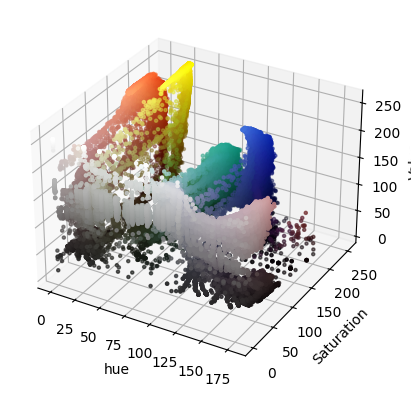

In [65]:
hsv_img = cv.cvtColor(img,cv.COLOR_RGB2HSV)
h,s,v = cv.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker = ".")
axis.set_xlabel("hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

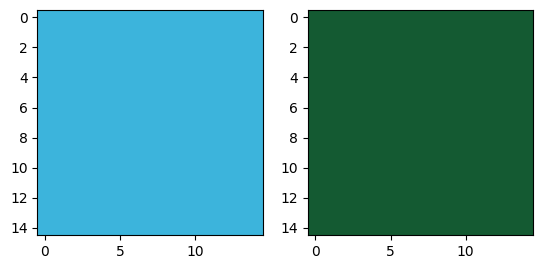

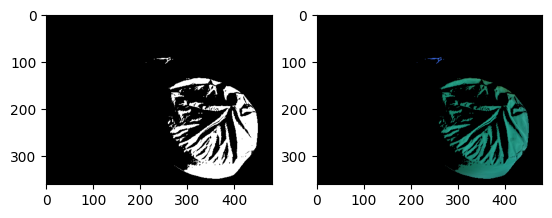

True

In [66]:
light_green = (60, 180, 220)
dark_green = (20, 90, 50)

lo_square = np.full((15,15,3),light_green, dtype = np.uint8) / 255.0
do_square = np.full((15,15,3),dark_green, dtype = np.uint8) / 255.0
plt.subplot(1,2,1)
plt.imshow((lo_square))
plt.subplot(1,2,2)
plt.imshow((do_square))
plt.show()

mask = cv.inRange(img, dark_green, light_green)
result = cv.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

img_modified = cv.cvtColor(result,cv.COLOR_BGR2RGB)
cv.imwrite('green_bag_rgb.png',img_modified)



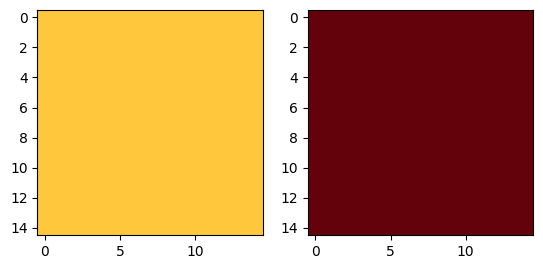

True

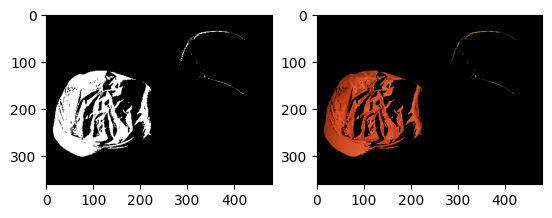

In [67]:
light_orange = (255, 200, 60)
dark_orange = (100, 2, 12)

lo_square = np.full((15,15,3),light_orange, dtype = np.uint8) / 255.0
do_square = np.full((15,15,3),dark_orange, dtype = np.uint8) / 255.0
plt.subplot(1,2,1)
plt.imshow((lo_square))
plt.subplot(1,2,2)
plt.imshow((do_square))

plt.show()

mask = cv.inRange(img, dark_orange, light_orange)
result = cv.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)

img_modified = cv.cvtColor(result,cv.COLOR_BGR2RGB)
cv.imwrite('orange_bag_rgb.png',img_modified)

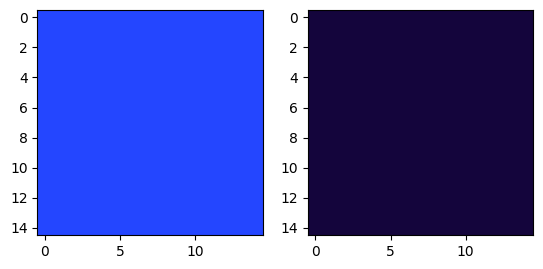

True

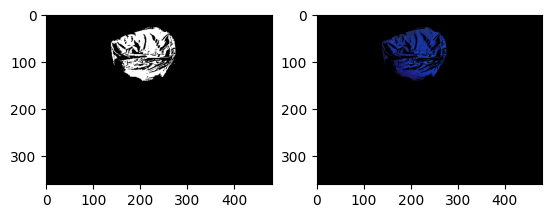

In [68]:
light_blue = (36, 70, 255)
dark_blue = (20, 5, 60)

lo_square = np.full((15,15,3),light_blue, dtype = np.uint8) / 255.0
do_square = np.full((15,15,3),dark_blue, dtype = np.uint8) / 255.0
plt.subplot(1,2,1)
plt.imshow((lo_square))
plt.subplot(1,2,2)
plt.imshow((do_square))

plt.show()

mask = cv.inRange(img, dark_blue, light_blue)
result = cv.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)

img_modified = cv.cvtColor(result,cv.COLOR_BGR2RGB)
cv.imwrite('blue_bag_rgb.png',img_modified)

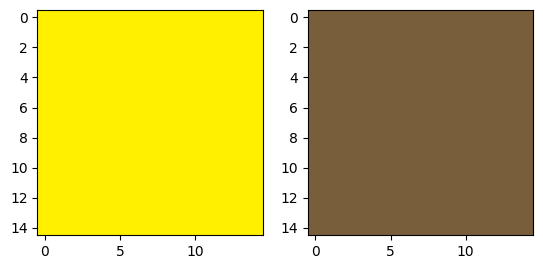

True

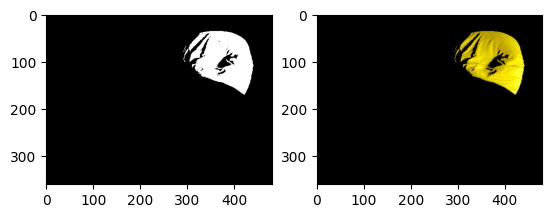

In [69]:
light_yellow = (40, 255, 255)
dark_yellow = (25, 130, 120)

lo_square = np.full((15,15,3),light_yellow, dtype = np.uint8) / 255.0
do_square = np.full((15,15,3),dark_yellow, dtype = np.uint8) / 255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))

plt.show()

mask = cv.inRange(hsv_img, dark_yellow, light_yellow)
result = cv.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)

img_modified = cv.cvtColor(result,cv.COLOR_BGR2RGB)
cv.imwrite('yellow_bag_rgb.png',img_modified)

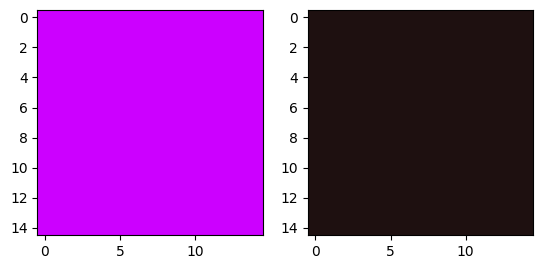

True

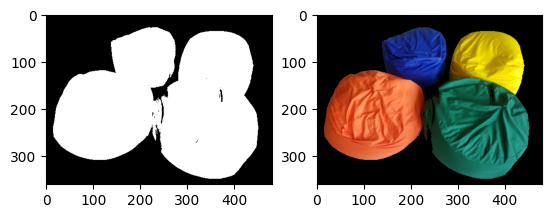

In [70]:
light_all_bags = (204, 255, 255)
dark_all_bags = (0, 112,30)

lo_square = np.full((15,15,3),light_all_bags, dtype = np.uint8) / 255.0
do_square = np.full((15,15,3),dark_all_bags, dtype = np.uint8) / 255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))

plt.show()

mask = cv.inRange(hsv_img, dark_all_bags, light_all_bags)
result = cv.bitwise_and(img, img, mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result)

img_modified = cv.cvtColor(result,cv.COLOR_BGR2RGB)
cv.imwrite('all_bags_rgb.png',img_modified)

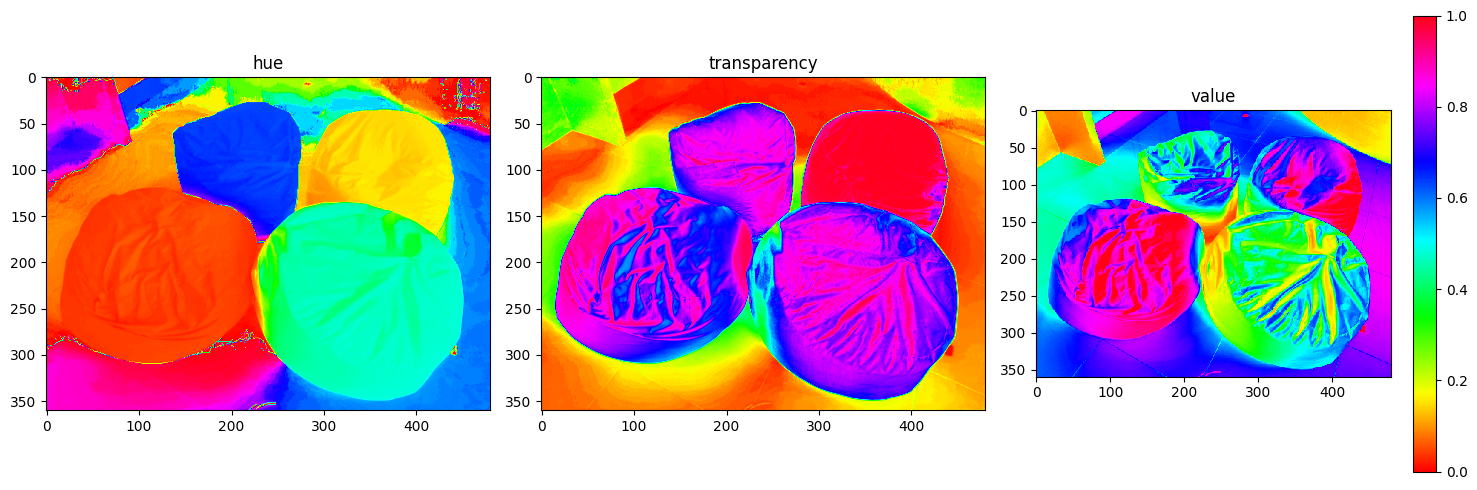

In [71]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(hsv_img[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1], cmap = 'hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:,:,2], cmap = 'hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()

True

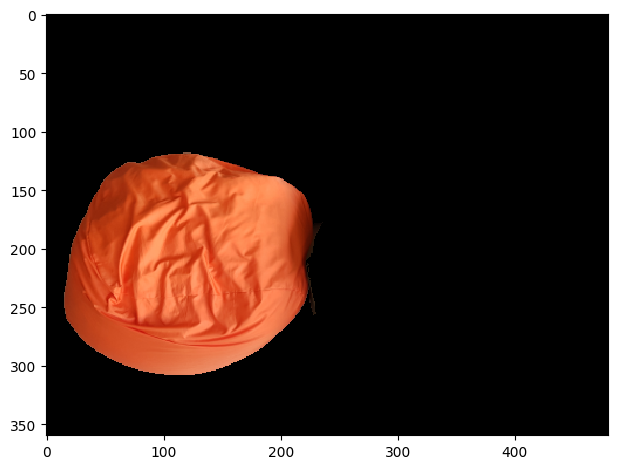

In [72]:
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 0.08
saturation_mask = hsv_img[:,:,1] > 0.5

mask2 = upper_mask*lower_mask*saturation_mask #se multiplican todas las mascaras

red = img[:,:,0]*mask2

green  =img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
imshow(img_masked)
img_modified = cv.cvtColor(img_masked,cv.COLOR_BGR2RGB)

cv.imwrite('green_bag_hsv.png',img_modified)

True

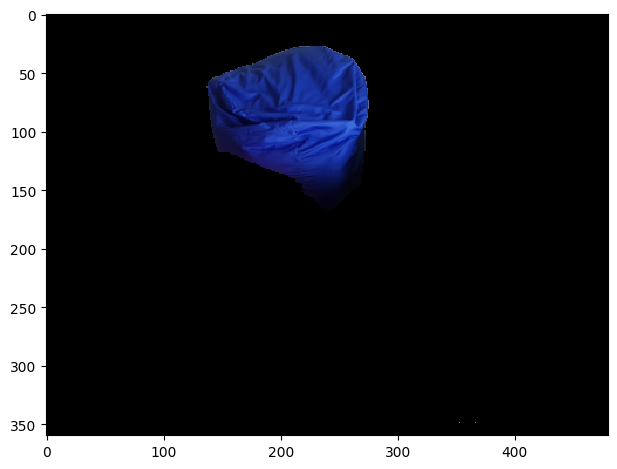

In [73]:
lower_mask = hsv_img[:,:,0] > 0.52
upper_mask = hsv_img[:,:,0] < 0.7
saturation_mask = hsv_img[:,:,1] > 0.3

mask2 = upper_mask*lower_mask*saturation_mask #se multiplican todas las mascaras

red = img[:,:,0]*mask2

green  =img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
imshow(img_masked)
img_modified = cv.cvtColor(img_masked,cv.COLOR_BGR2RGB)

cv.imwrite('green_bag_hsv.png',img_modified)

True

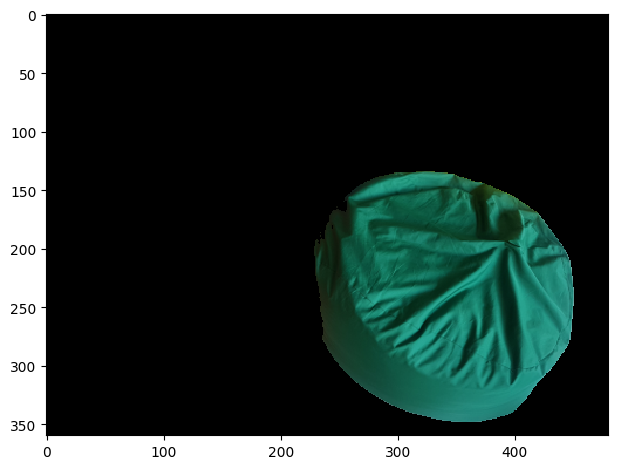

In [77]:
lower_mask = hsv_img[:,:,0] > 0.22
upper_mask = hsv_img[:,:,0] < 0.5
saturation_mask = hsv_img[:,:,1] > 0.3

mask2 = upper_mask*lower_mask*saturation_mask #se multiplican todas las mascaras

red = img[:,:,0]*mask2

green  =img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
imshow(img_masked)
img_modified = cv.cvtColor(img_masked,cv.COLOR_BGR2RGB)

cv.imwrite('green_bag_hsv.png',img_modified)

True

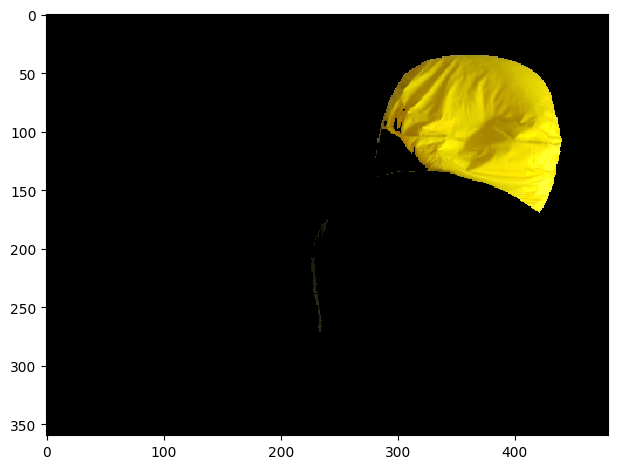

In [75]:
lower_mask = hsv_img[:,:,0] > 0.12
upper_mask = hsv_img[:,:,0] < 0.18
saturation_mask = hsv_img[:,:,1] > 0.38

mask2 = upper_mask*lower_mask*saturation_mask #se multiplican todas las mascaras

red = img[:,:,0]*mask2

green  =img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
imshow(img_masked)
img_modified = cv.cvtColor(img_masked,cv.COLOR_BGR2RGB)

cv.imwrite('green_bag_hsv.png',img_modified)

True

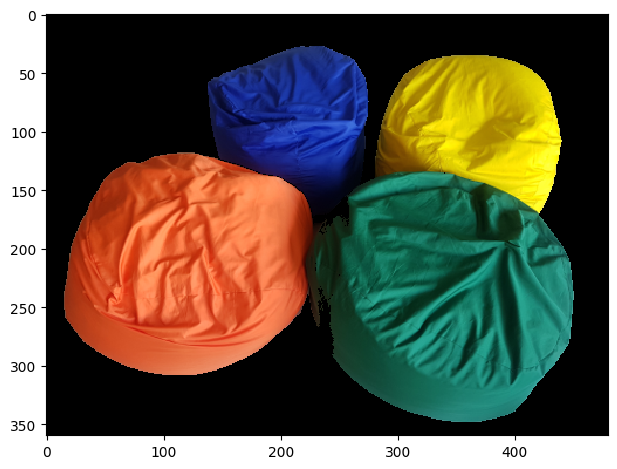

In [76]:
lower_mask = hsv_img[:,:,0] > 0.0
upper_mask = hsv_img[:,:,0] < 0.8
saturation_mask = hsv_img[:,:,1] > 0.44

mask2 = upper_mask*lower_mask*saturation_mask #se multiplican todas las mascaras

red = img[:,:,0]*mask2

green  =img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red, green, blue))
imshow(img_masked)
img_modified = cv.cvtColor(img_masked,cv.COLOR_BGR2RGB)

cv.imwrite('green_bag_hsv.png',img_modified)